In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import  pyplot as plt
%config Completer.use_jedi = False
data = pd.read_csv("airlines_flights_data.csv")

In [3]:
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.drop(columns='index', inplace=True)

In [5]:
data.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [6]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
data[data['duration'] == 49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [11]:
data[data['duration'] == 0.830000].head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498


In [12]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

**MOST FREQUENT AIRLINES**

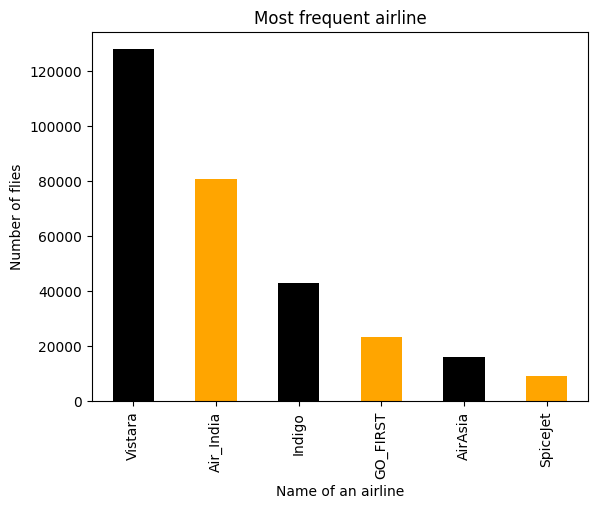

In [26]:
data['airline'].value_counts().plot(kind='bar', color=['black', 'orange'])
plt.title('Most frequent airline')
plt.ylabel('Number of flies')
plt.xlabel('Name of an airline')
plt.show()

**MOST FREQUENT DEPARTURE AND ARRIVAL TIME**

In [27]:
departure = data['departure_time'].value_counts()
arrival = data['arrival_time'].value_counts()

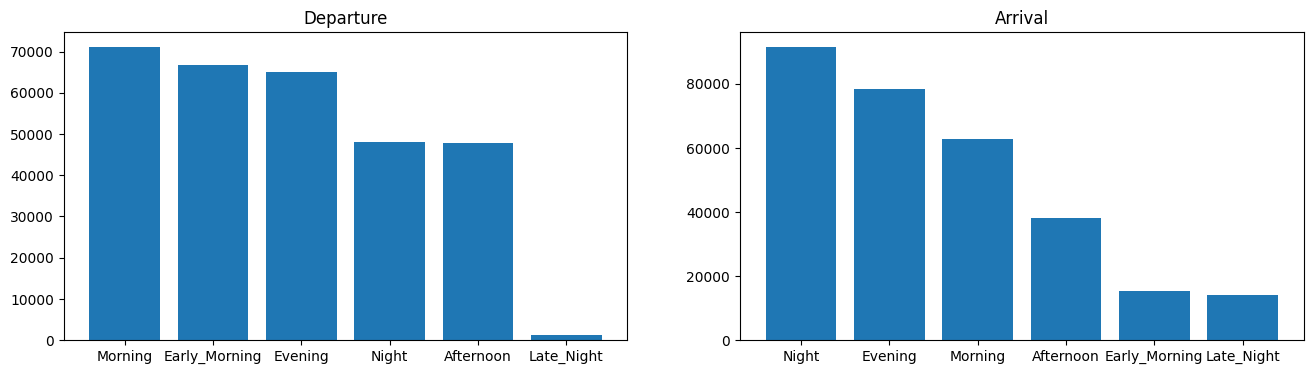

In [72]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.bar(x=departure.index, height=departure.values)
plt.title('Departure')
plt.subplot(1,2,2)
plt.bar(x=arrival.index, height=arrival.values)
plt.title('Arrival')
plt.show()

**BAR GRAPHS OF SOURCE AND DESTINATION**

In [62]:
source = data['source_city'].value_counts()
destination = data['destination_city'].value_counts()

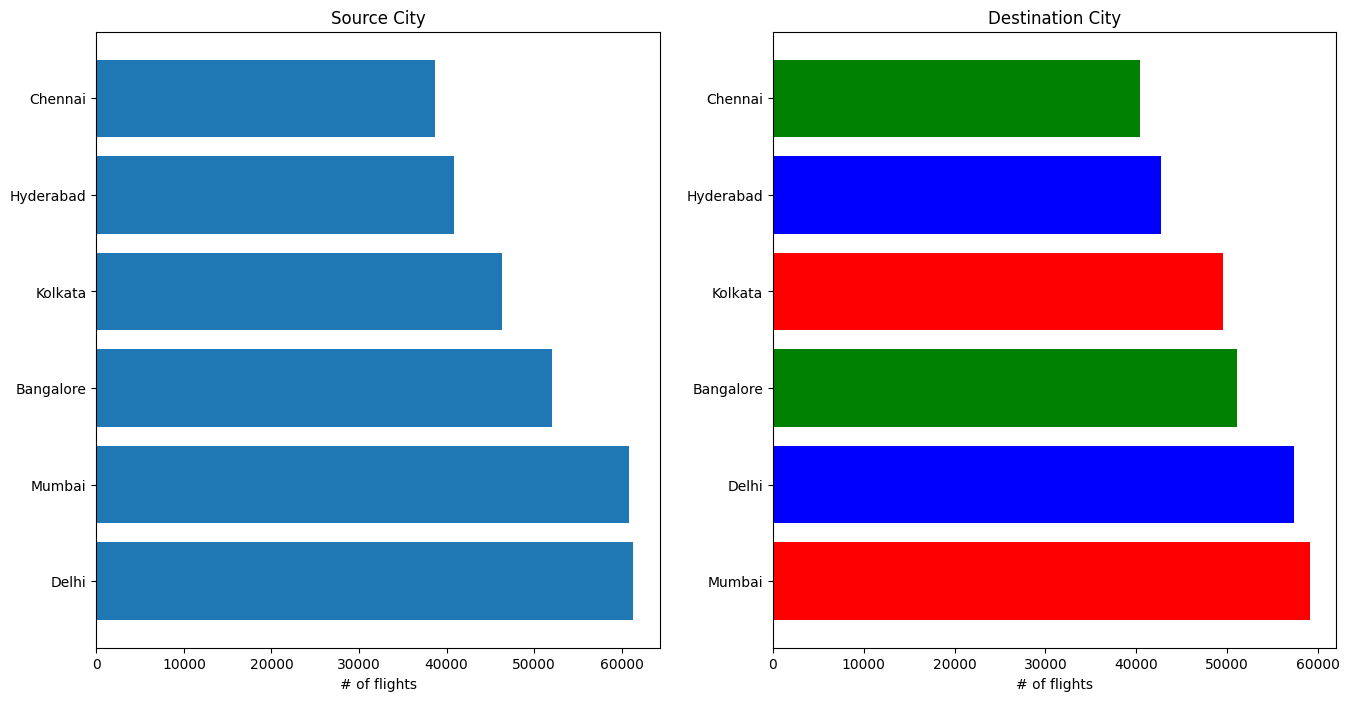

In [83]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.barh(source.index, source.values)
plt.xlabel('# of flights')
plt.title('Source City')
plt.subplot(122)
plt.barh(destination.index, destination.values, color=['r', 'b', 'g'])
plt.title('Destination City')
plt.xlabel('# of flights')
plt.show()

**RANK AIRLINES BY PRICES**

In [96]:
airline_prices = data.groupby('airline')['price'].mean()
airline_prices.rank()

airline
AirAsia      1.0
Air_India    5.0
GO_FIRST     3.0
Indigo       2.0
SpiceJet     4.0
Vistara      6.0
Name: price, dtype: float64

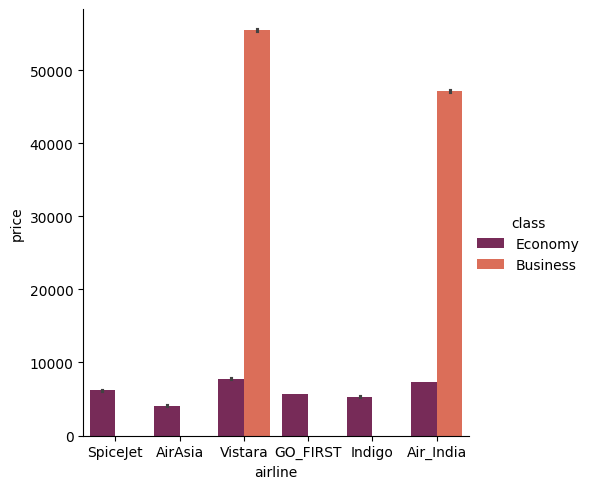

In [102]:
sns.catplot(x='airline', y='price', kind='bar', palette='rocket', hue='class', data=data)
plt.show()

**CORRELATION OF DEPARTURE TIME AND PRICE**

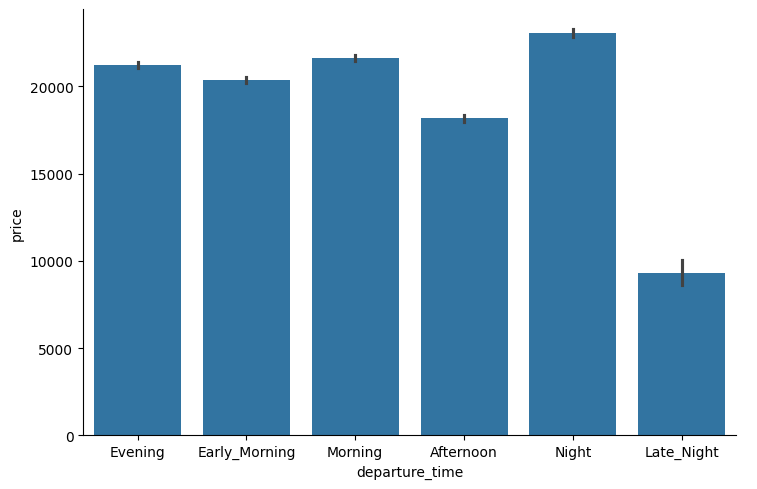

In [110]:
sns.catplot(x='departure_time', y='price', kind='bar', data=data, aspect=1.5)

plt.show()

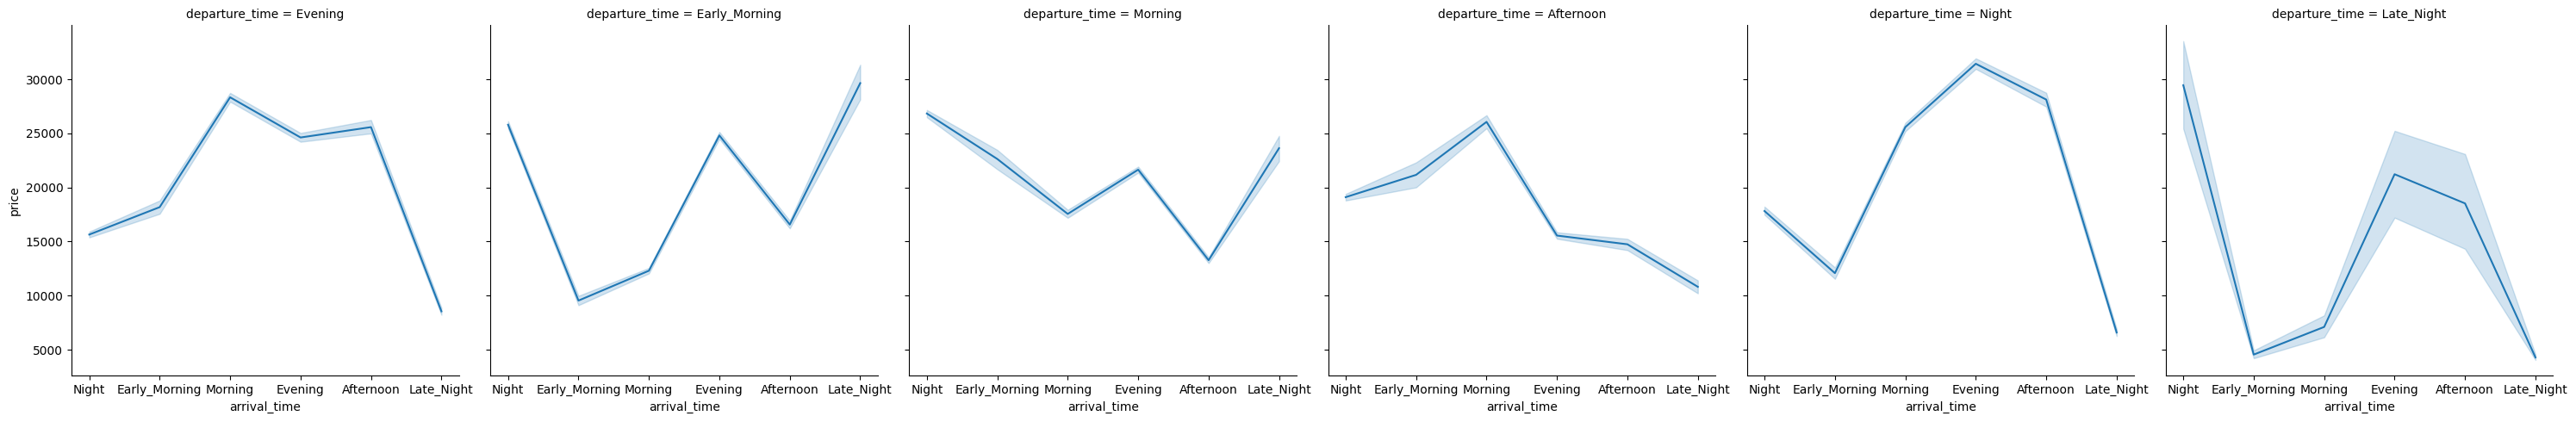

In [115]:
sns.relplot(x='arrival_time', y='price', data=data, col='departure_time', kind='line')

**CORRELATION OF CITY AND PRICE**

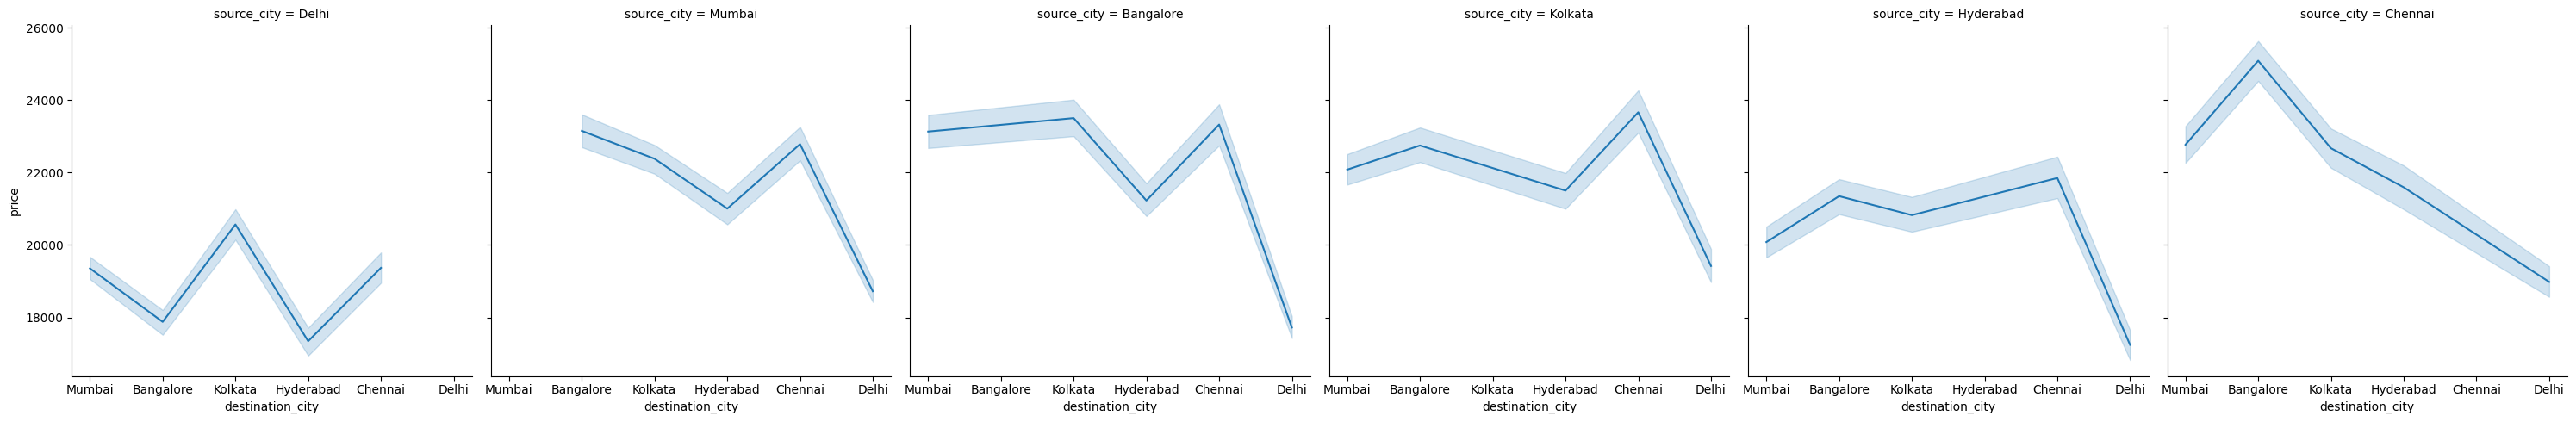

In [119]:
sns.relplot(x='destination_city', y='price', data=data, col='source_city', kind='line')
plt.show()

**BUYING TICKETS 1-2 DAYS BEFORE THE FLIGHT**

In [125]:
data.groupby('days_left')['price'].mean().sort_values().head()

days_left
47    18553.272038
49    18992.971888
48    18998.126851
44    19049.080174
40    19144.972439
Name: price, dtype: float64

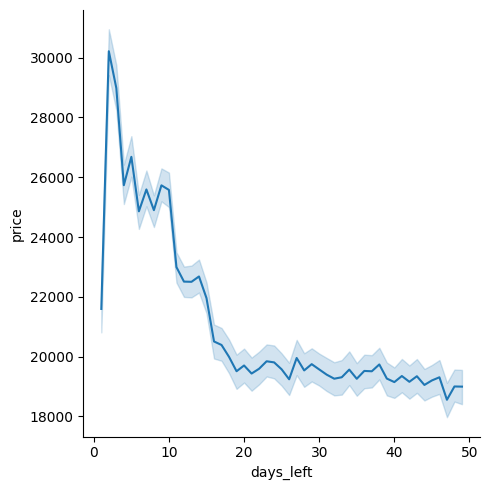

In [127]:
sns.relplot(x='days_left', y='price', data=data, kind='line')
plt.show()

**AVERAGE PRICE FOR ECONOMY AND BUSINESS TICKETS**

In [130]:
data[data['class'] == 'Economy']['price'].mean()

np.float64(6572.342383362527)

In [131]:
data[data['class'] == 'Business']['price'].mean()

np.float64(52540.08112357868)

**AVERAGE PRICE OF VISTARA FROM DELHI TO HYDERABAD IN BUSINESS**

In [135]:
data[(data['airline'] == 'Vistara') & (data['class'] == 'Business') & (data['source_city'] == 'Delhi')
    & (data['destination_city'] == 'Hyderabad')]['price'].mean()

np.float64(47939.840361445786)